In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure as fig
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

In [25]:
df = pd.read_csv('data/intervals.csv', nrows=15000)

In [26]:
df.tail()

,Unnamed: 0,interval,origindex,timestamp,uniquename
14995,14995,891.0,2235705.0,2018-10-23 16:28:37,1000-11
14996,14996,878.0,2236535.0,2018-10-23 16:43:15,1000-11
14997,14997,883.0,2237285.0,2018-10-23 16:57:58,1000-11
14998,14998,881.0,2238096.0,2018-10-23 17:12:39,1000-11
14999,14999,883.0,2238863.0,2018-10-23 17:27:22,1000-11


In [27]:
df.head()

,Unnamed: 0,interval,origindex,timestamp,uniquename
0,0,NaN,NaN,NaN,NaN
1,1,547.0,1419183.0,2018-10-08 13:00:07,1000-0
2,2,841.0,1419804.0,2018-10-08 13:14:08,1000-0
3,3,901.0,1420489.0,2018-10-08 13:29:09,1000-0
4,4,883.0,1421166.0,2018-10-08 13:43:52,1000-0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1dfc6da0>,
      dtype=object)

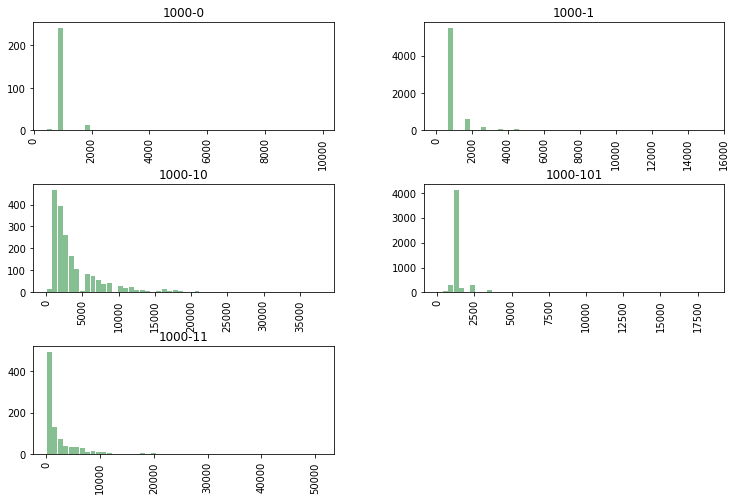

In [31]:
# using matplotlib directly from df.hist()
df.hist(column='interval', by='uniquename', bins=50, grid=False, layout=(3,2), figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


In [29]:
# use group-by and then call seaborn to get the histogram on each group
gps = df.groupby(by='uniquename')['interval']
len(gps)

5

1000-0 267 mean      1016.363296
var     482125.360001
Name: interval, dtype: float64
1000-1 6575 mean      1190.463878
var     978016.803342
Name: interval, dtype: float64
1000-10 1904 mean    4.113344e+03
var     2.110759e+07
Name: interval, dtype: float64
1000-101 5293 mean    1.480439e+03
var     1.061198e+06
Name: interval, dtype: float64
1000-11 956 mean    3.680765e+03
var     3.782360e+07
Name: interval, dtype: float64


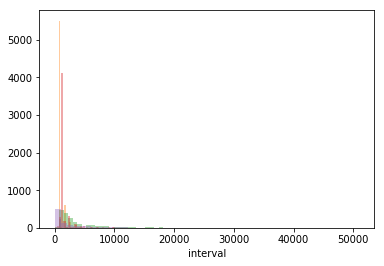

In [34]:
for (name, group) in gps:
    print(name, len(group), group.agg({'mean': np.mean, 'var': np.var}))
    # input()
    sns.distplot(a=group, label=name, kde=False)